### P R O B L E M    
### S T A T E M E N T :  
### Develop a sophisticated predictive model to estimate diamond prices based on carat, cut, color, clarity, depth, table, x, y, and z features, aiming to enhance pricing accuracy and decision-making in the diamond industry.


- Objective:
    -The objective of this project is to develop a sophisticated predictive model that can accurately estimate diamond prices based on the given features: carat, cut, color, clarity, depth, table, X, Y, and Z. By leveraging advanced machine learning techniques, the model aims to capture the intricate relationships and patterns within the data to provide reliable price predictions for diamonds.

#### FLOW:
- EDA
- Hypothesis Test (chisq for cat)
- If required, combine X ,Y ,Z
- LINEAR REG, LASSO, RIDGE, ELASTIC NET 
- INTERPRET THE ABOVE 
- XGBOOST REGRESSION 
- MAKE STREAMLIT APP 

### DESCRIPTION:

**A) "Four Cs" used to evaluate the quality and value of a diamond:**

**1. Carat:** 
- Carat weight refers to the measurement of a diamond's weight. One carat is equal to 200 milligrams. Diamonds with higher carat weights are generally rarer and more valuable, as larger diamonds are less common to find in nature. 
- Carat weight is an important factor in determining the overall size and visual impact of a diamond.


**2. Cut:** 
- The cut of a diamond refers to how well it has been shaped and faceted. The cut directly impacts the diamond's brilliance and sparkle. 
- A well-cut diamond reflects and refracts light in a way that maximizes its natural beauty. The cut is evaluated based on factors such as the proportions, symmetry, and polish of the diamond. The quality of the cut can significantly affect the diamond's value and visual appeal.
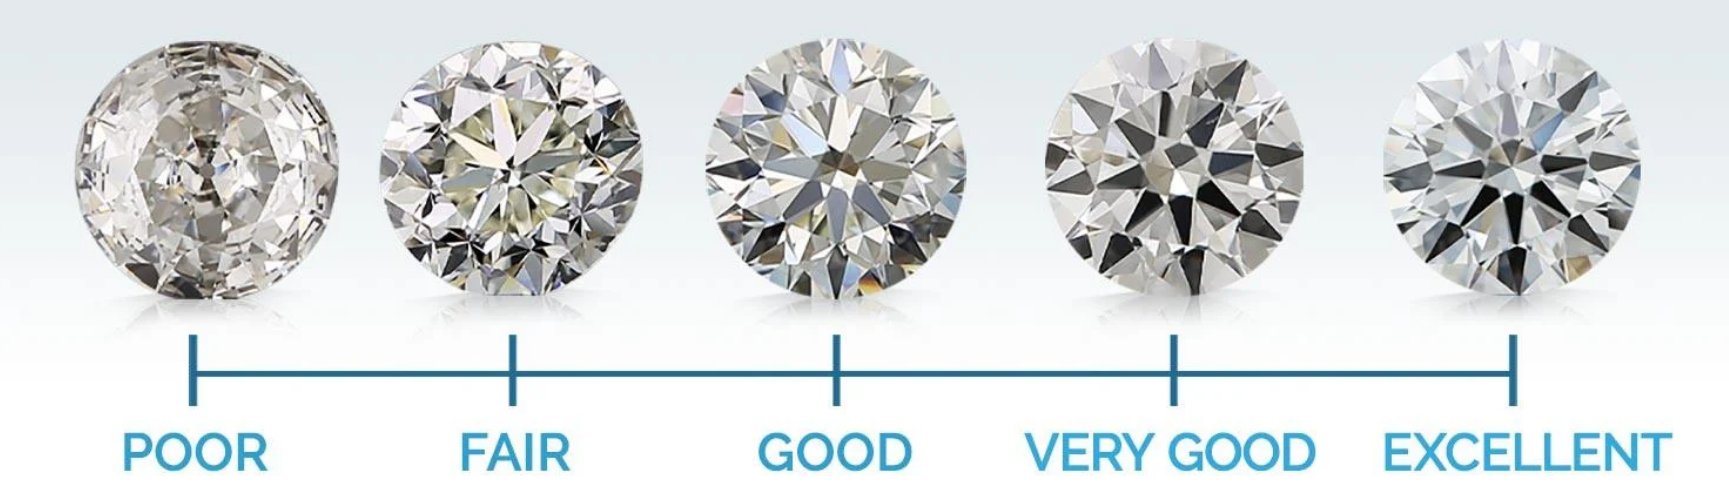


**3. Color:** 
- Color grading assesses the presence of any color in a white diamond. The Gemological Institute of America (GIA) uses a scale from D (colorless) to Z (light yellow or brown) to classify the color of diamonds.
- As the color grade moves down the scale, the presence of yellow or brown hues becomes more prominent, affecting the diamond's value.
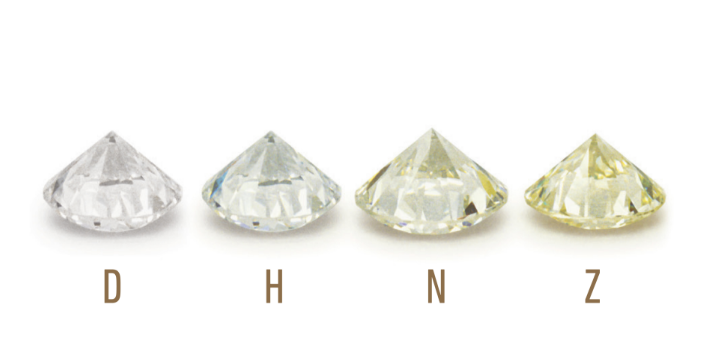

**4. Clarity:**
- Clarity refers to the presence of any internal or external flaws, known as inclusions and blemishes, respectively, in a diamond. The clarity grade evaluates the number, size, visibility, and position of these imperfections. 
- The GIA grades clarity on a scale from Flawless (no inclusions or blemishes visible under 10x magnification) to Included (inclusions visible to the naked eye). Diamonds with higher clarity grades, indicating fewer and less noticeable flaws, are more valuable and sought after.
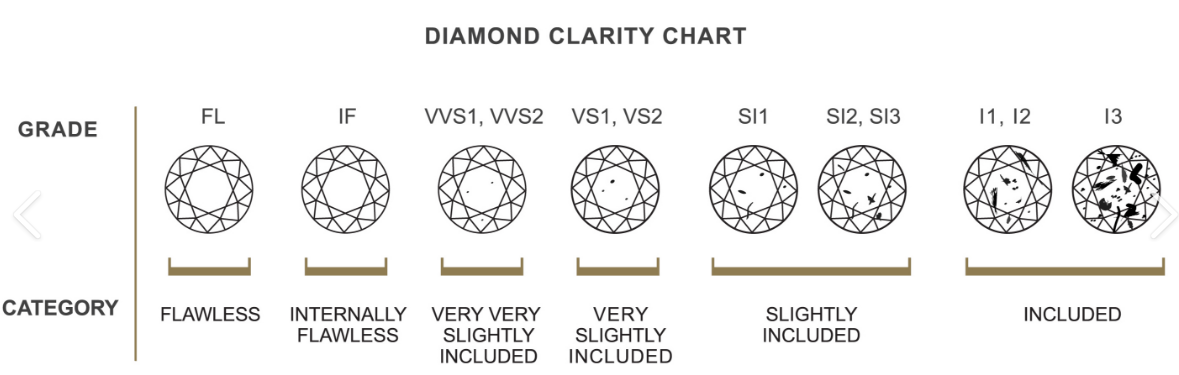

**B) Dimensions:**  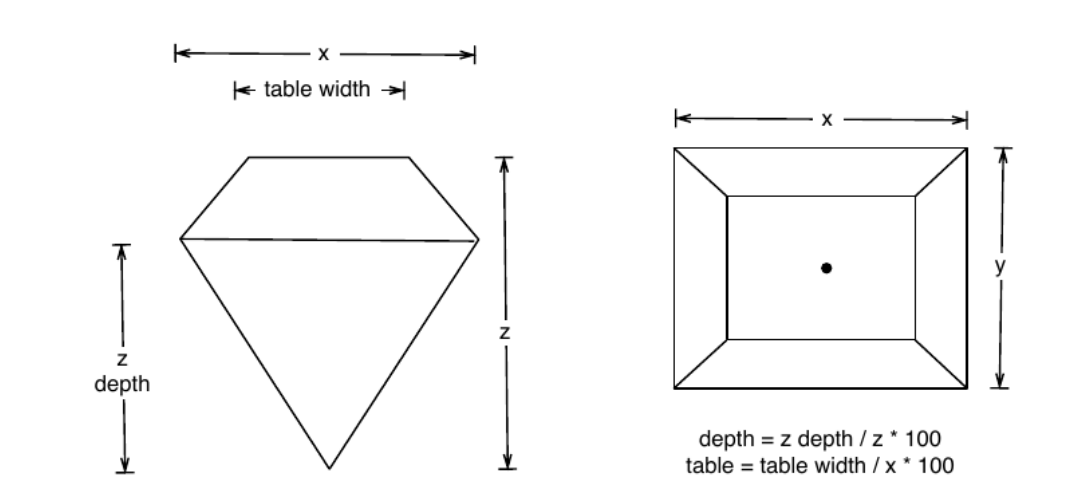


### EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [2]:
#read the dataset
df=pd.read_csv('DiamondsPrices.csv')

In [3]:
#copy the dataframe 
df2 = df.copy()

In [4]:
df.head(5)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


### 9 features, each contributing to the quality of the diamond

In [5]:
#no NaN values
df.isna().any()

carat      False
cut        False
color      False
clarity    False
depth      False
table      False
price      False
x          False
y          False
z          False
dtype: bool

In [6]:
#check for null
df.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [7]:
df.shape

(53940, 10)

In [8]:
df.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

In [9]:
df.info()
#checking for datatypes of each feature 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [10]:
#summary statistics
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


**Interpretation:** 
- From the count, we can say there are zero missing values 
    - Average price of diamonds, irrespective of the 'FOUR C's' is 3932
    - 75% of diamonds are 1 carat and below, the model will be naturally prone to predicting appropriately for carat less than or equal to one
    - Average dimension of diamonds is **5x5x3** and the price is $3932
    - The minimum dimension shows that there might be missing values in the dataset 
    - This can also mean that diamonds with x=0, dont necessarily have to have y=0 and z=0 

### UNIVARIATE ANALYSIS

### Categorical Features:

In [11]:
df.cut.unique() 

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [12]:
df.color.unique()

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

In [13]:
df.clarity.unique()

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

In [14]:
df_cat = df.select_dtypes(include='object')

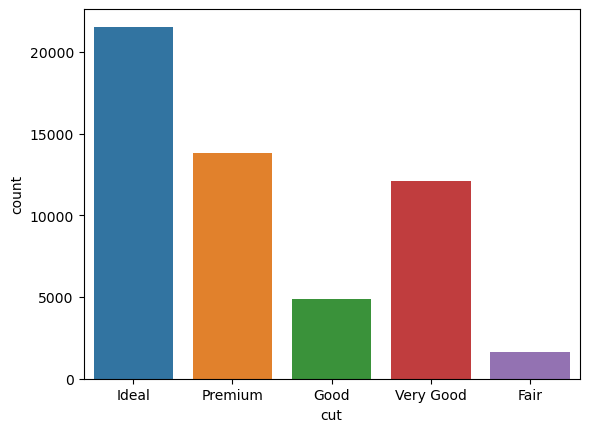

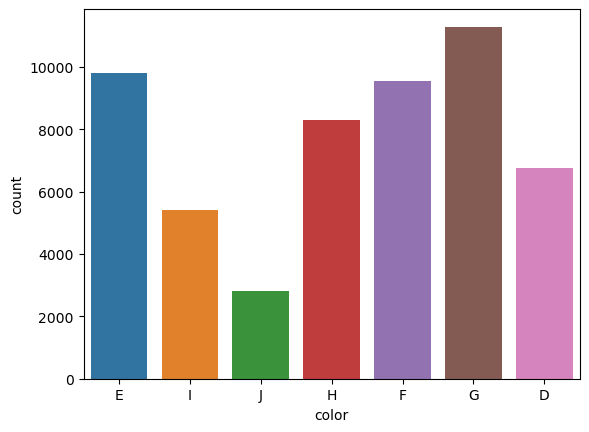

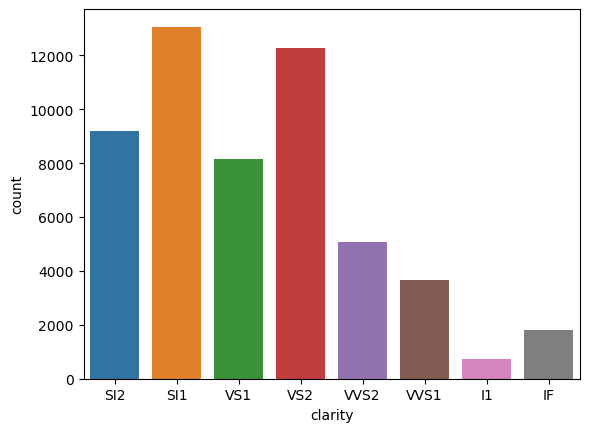

In [15]:
# def countplot:
for col in df_cat:
    sns.countplot(data=df_cat,x=col)
    plt.show()

### INTERPRETAION:
- Most of the diamonds are in the ideal cut category, and the least cut are the fair ones 
- Diamonds of clarity -IL is the least in the dataset 
- Color D,E,F,G,H are fairly higher, which means that majority of the diamond quality in this dataset is good
- There are no poor-cut iamonds in the data 
- Overall, the quality of diamonds in this dataset fall on the good side

### Numeric Features:

Plot a density plot to study the distribution of the features, check for skewness, and kurtosis

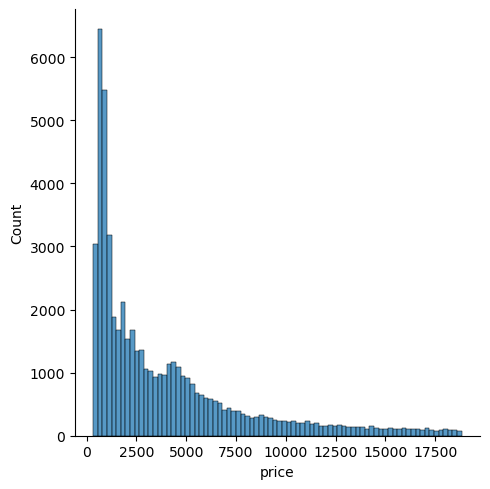

In [16]:
sns.displot(df['price'])

#### Apply log transformation on label


In [17]:
df['price'] = df['price'].apply(np.log)
df.price

0        5.786897
1        5.786897
2        5.789960
3        5.811141
4        5.814131
           ...   
53935    7.921898
53936    7.921898
53937    7.921898
53938    7.921898
53939    7.921898
Name: price, Length: 53940, dtype: float64

<Axes: xlabel='price', ylabel='Density'>

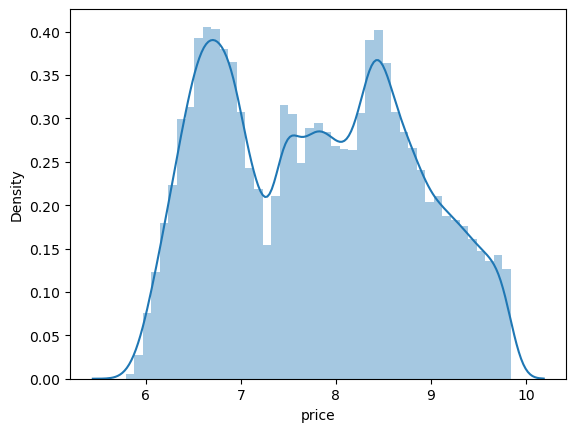

In [18]:
sns.distplot(df['price'])

<Axes: xlabel='carat', ylabel='Density'>

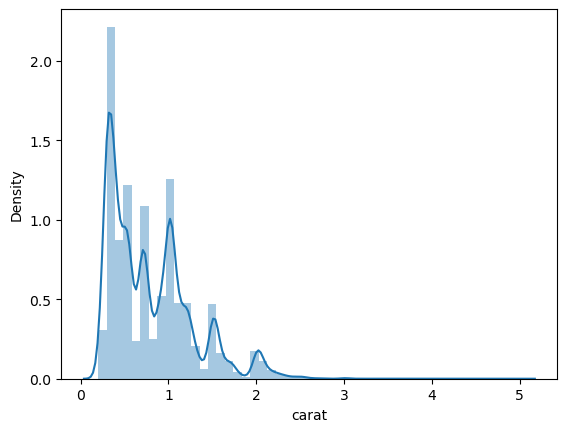

In [19]:
sns.distplot(df['carat'])  

<Axes: xlabel='depth', ylabel='Density'>

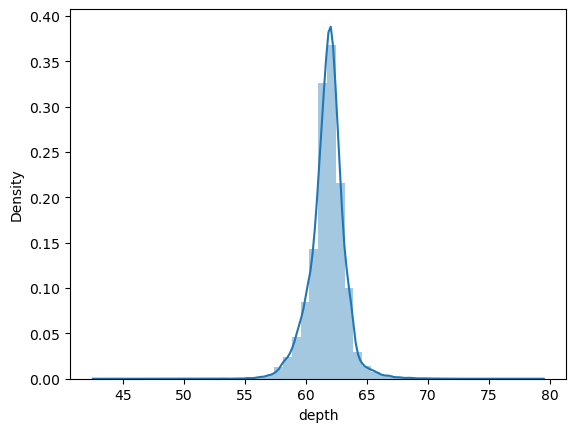

In [20]:
sns.distplot(df['depth']) 

<Axes: xlabel='table', ylabel='Density'>

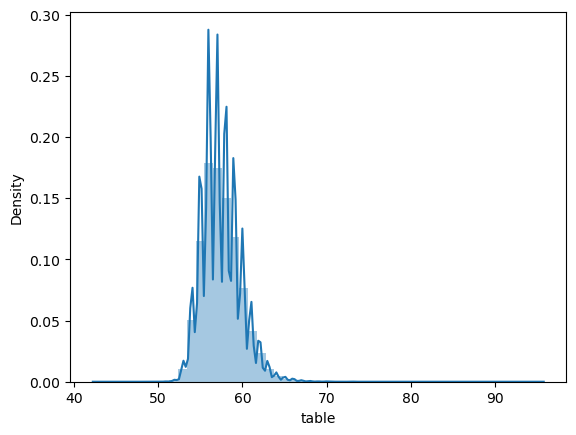

In [21]:
sns.distplot(df['table']) 

<Axes: xlabel='x', ylabel='Density'>

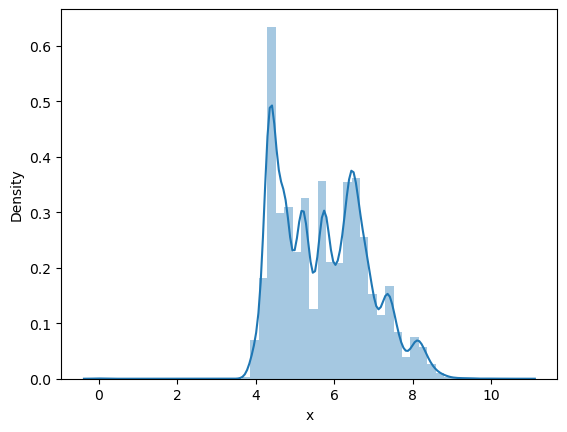

In [22]:
sns.distplot(df['x']) 

<Axes: xlabel='y', ylabel='Density'>

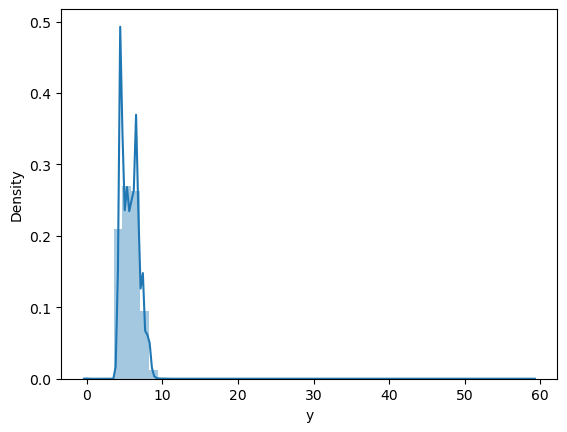

In [23]:
sns.distplot(df['y']) 

<Axes: xlabel='z', ylabel='Density'>

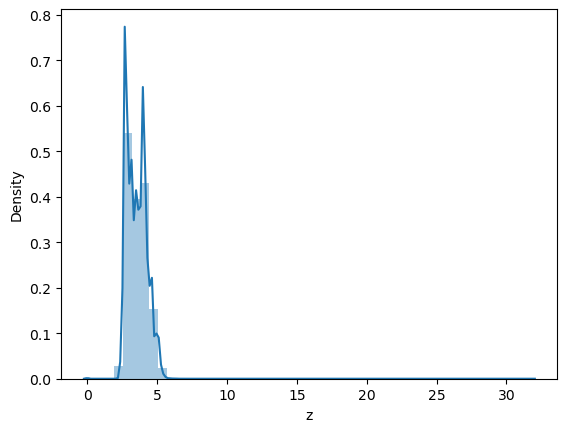

In [24]:
sns.distplot(df['z']) 

### Interpretation:
- Depth is the only feature that appears to be normally distributed , it is leptokurtic, i.e., with less variation
- y & z seem to be right skewed, while x seems to be left skewed (this could be because of the 5 carat diamond in data)


### Bivariate Variate Analysis

In [25]:
df_num = df.select_dtypes(include='number')

In [26]:
df_num.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,5.786897,3.95,3.98,2.43
1,0.21,59.8,61.0,5.786897,3.89,3.84,2.31
2,0.23,56.9,65.0,5.789960,4.05,4.07,2.31
3,0.29,62.4,58.0,5.811141,4.20,4.23,2.63
4,0.31,63.3,58.0,5.814131,4.34,4.35,2.75


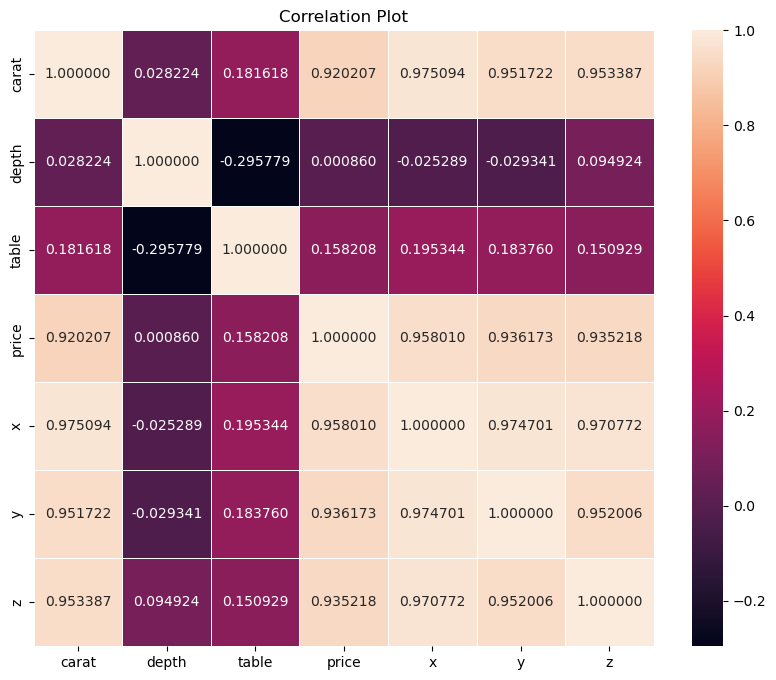

In [27]:
# correlation matrix
corr_matrix = df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True,fmt='2f',linewidths=0.5)
plt.title("Correlation Plot")
plt.show()

### Inferences :
- Carat is highly correlated with the label - price, and also the dimensions of the diamond
- Again, price is highly correlated with the do=imensions x,y,z and most with the carat
   - This means with increase in carat, price will also increase by a certain factor/parameter 
- The dimensions x,y,z are highly correlated with each other
   - This leaves an opportunity to combine the features x,y,z into a single 'volume' column to prevent the effect of multicollinearity 


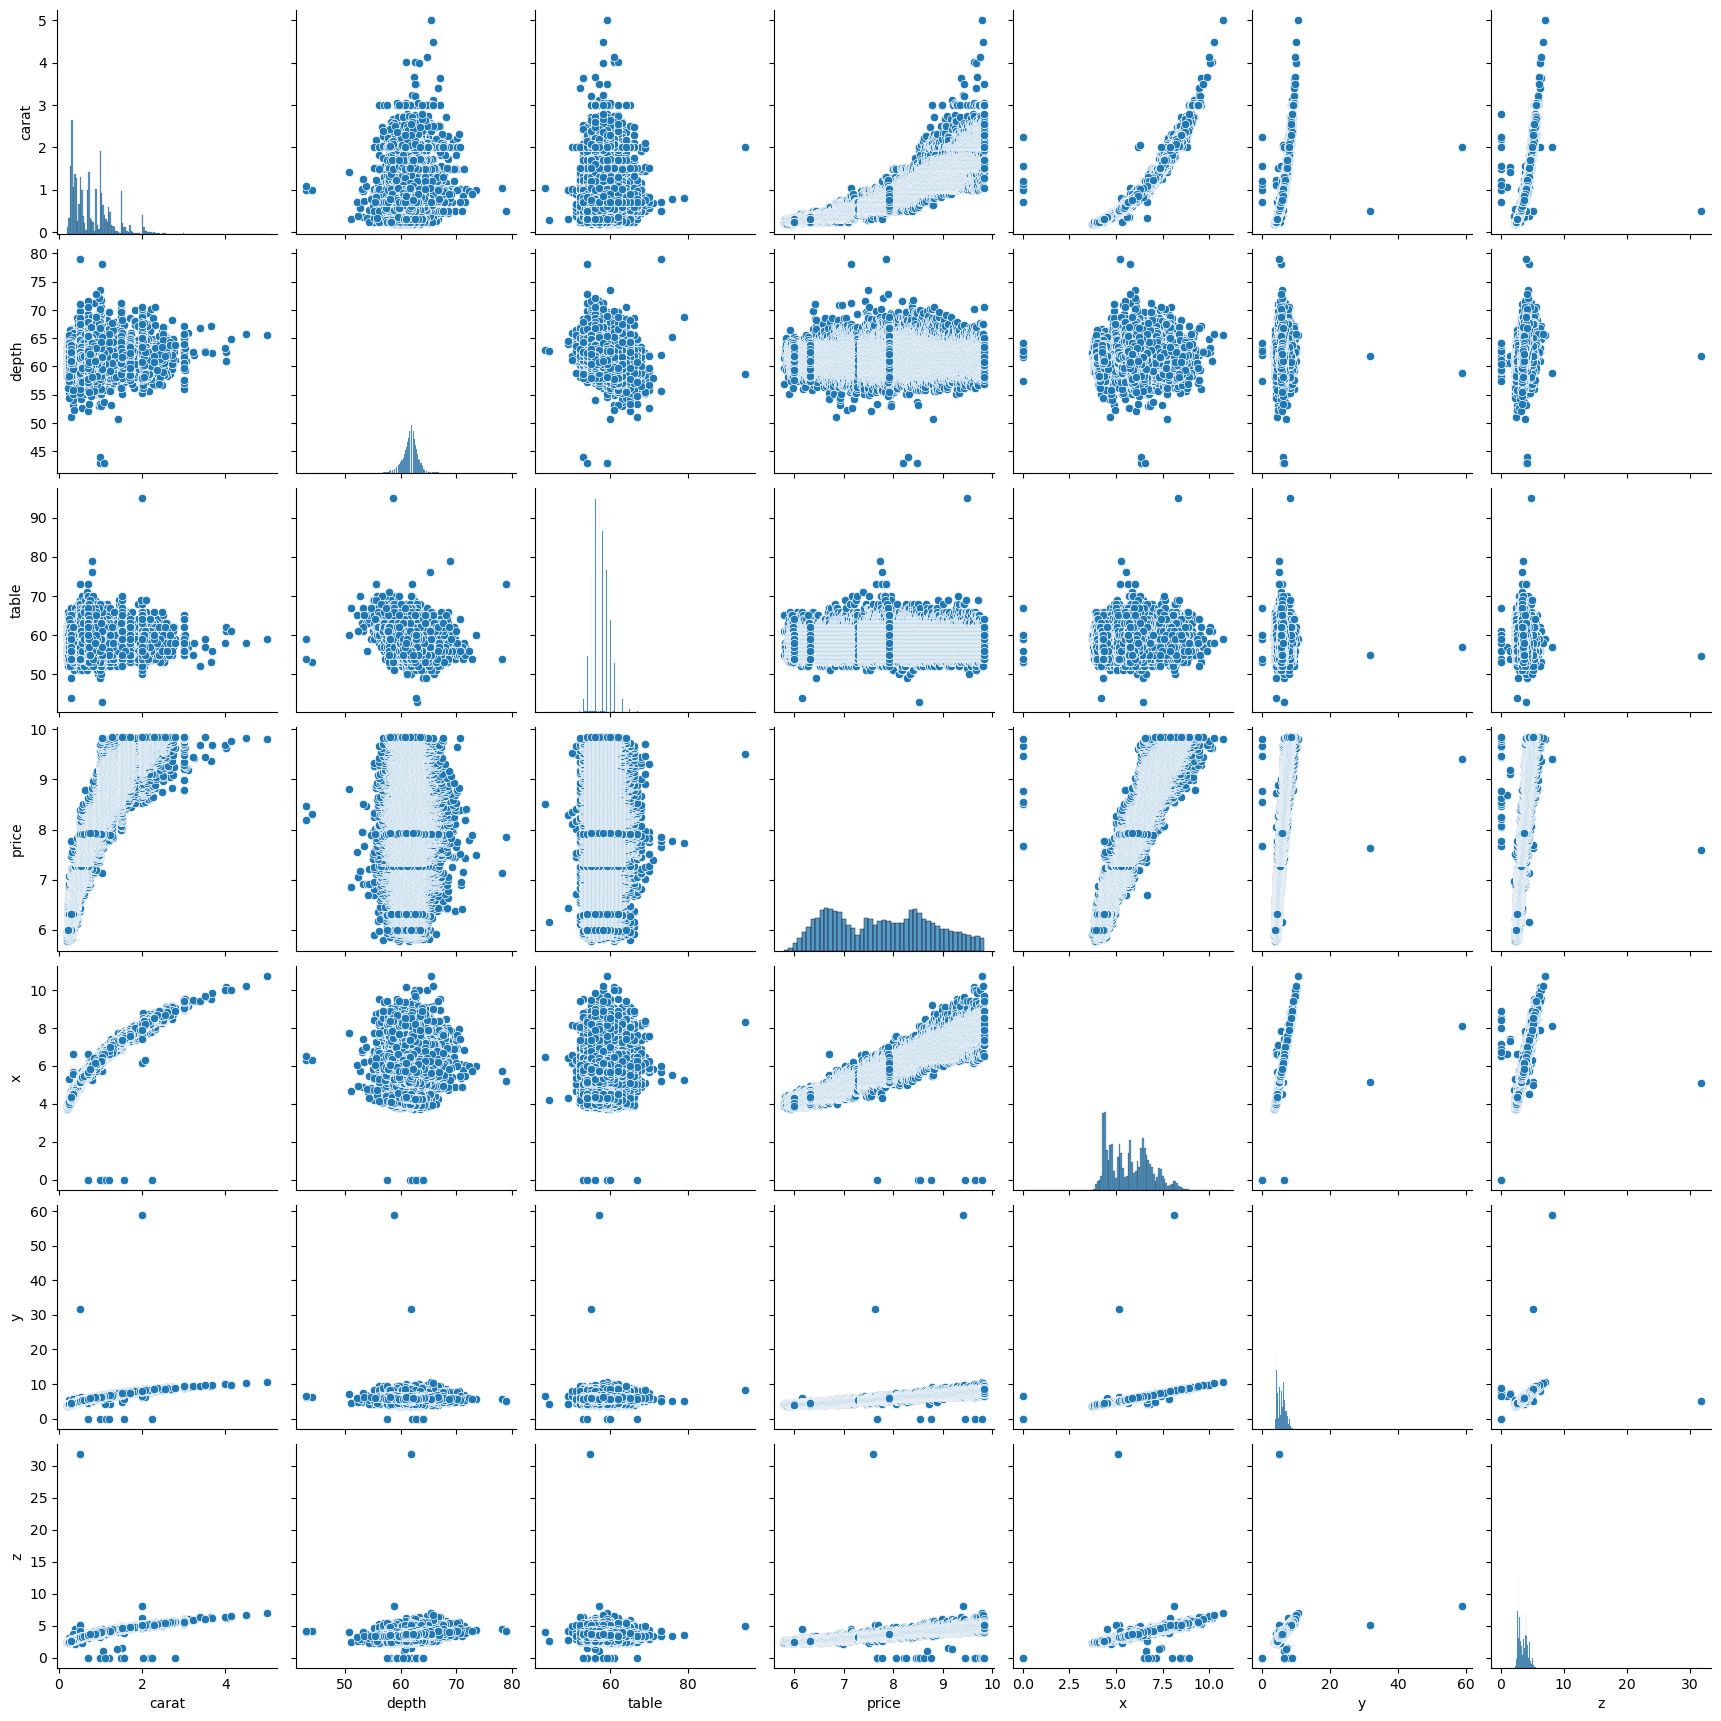

In [28]:
sns.pairplot(df_num)
plt.show()

In [29]:
cross_tab = pd.crosstab(df['clarity'],df['cut'])
print(cross_tab)

cut      Fair  Good  Ideal  Premium  Very Good
clarity                                       
I1        210    96    146      205         84
IF          9    71   1212      230        268
SI1       408  1560   4282     3575       3240
SI2       466  1081   2598     2949       2100
VS1       170   648   3589     1989       1775
VS2       261   978   5071     3357       2591
VVS1       17   186   2047      616        789
VVS2       69   286   2606      870       1235


### OHE - Categorical Features

In [30]:
from sklearn.preprocessing import OneHotEncoder
encode = OneHotEncoder(drop='first')
df_encoded = pd.DataFrame(encode.fit_transform(df_cat).toarray(), columns=encode.get_feature_names_out())

In [31]:
df_encoded

,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_E,color_F,color_G,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
53936,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
53937,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
53938,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


### Scaling of Numeric Features

In [32]:
from sklearn.preprocessing import MinMaxScaler
min_max = MinMaxScaler()
df_num = df_num.drop(columns='price')
df_scaled = min_max.fit_transform(df_num)
df_scaled = pd.DataFrame(df_scaled, columns= min_max.get_feature_names_out())
df_scaled

,carat,depth,table,x,y,z
0,0.006237,0.513889,0.230769,0.367784,0.067572,0.076415
1,0.002079,0.466667,0.346154,0.362197,0.065195,0.072642
2,0.006237,0.386111,0.423077,0.377095,0.069100,0.072642
3,0.018711,0.538889,0.288462,0.391061,0.071817,0.082704
4,0.022869,0.563889,0.288462,0.404097,0.073854,0.086478
...,...,...,...,...,...,...
53935,0.108108,0.494444,0.269231,0.535382,0.097793,0.110063
53936,0.108108,0.558333,0.230769,0.529795,0.097623,0.113522
53937,0.103950,0.550000,0.326923,0.527002,0.096435,0.111950
53938,0.137214,0.500000,0.288462,0.572626,0.103905,0.117610


In [33]:
df_new= pd.concat([df_encoded, df_scaled,df.price], axis=1)

In [34]:
df_new

,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_E,color_F,color_G,color_H,color_I,color_J,...,clarity_VS2,clarity_VVS1,clarity_VVS2,carat,depth,table,x,y,z,price
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.006237,0.513889,0.230769,0.367784,0.067572,0.076415,5.786897
1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.002079,0.466667,0.346154,0.362197,0.065195,0.072642,5.786897
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.006237,0.386111,0.423077,0.377095,0.069100,0.072642,5.789960
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.018711,0.538889,0.288462,0.391061,0.071817,0.082704,5.811141
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.022869,0.563889,0.288462,0.404097,0.073854,0.086478,5.814131
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.108108,0.494444,0.269231,0.535382,0.097793,0.110063,7.921898
53936,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.108108,0.558333,0.230769,0.529795,0.097623,0.113522,7.921898
53937,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.103950,0.550000,0.326923,0.527002,0.096435,0.111950,7.921898
53938,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.137214,0.500000,0.288462,0.572626,0.103905,0.117610,7.921898


In [35]:
df_new.isna().sum()

cut_Good         0
cut_Ideal        0
cut_Premium      0
cut_Very Good    0
color_E          0
color_F          0
color_G          0
color_H          0
color_I          0
color_J          0
clarity_IF       0
clarity_SI1      0
clarity_SI2      0
clarity_VS1      0
clarity_VS2      0
clarity_VVS1     0
clarity_VVS2     0
carat            0
depth            0
table            0
x                0
y                0
z                0
price            0
dtype: int64

In [36]:
import statsmodels.api as sm

In [37]:
X = df_new.drop(columns='price')
y = df_new.price

**F-STAT**

**H0: All co-efficients = 0, model is insignificant**

**H1: One of the co-efficinets, model is significant**

In [38]:
X = sm.add_constant(X)
model = sm.OLS(y,X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.970
Model:                            OLS   Adj. R-squared:                  0.970
Method:                 Least Squares   F-statistic:                 7.597e+04
Date:                Mon, 03 Jul 2023   Prob (F-statistic):               0.00
Time:                        22:13:18   Log-Likelihood:                 17312.
No. Observations:               53940   AIC:                        -3.458e+04
Df Residuals:                   53916   BIC:                        -3.436e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.6389      0.026    -24.692

**HYPOTHESIS FOR T-TEST**

**H0 : Co-efficint for that feature = 0, making the feature insignificant**

**H1 : Co-efficient for that feature not equal to 0, making that feature significant** 


### Inference 
- We know that x,y & z are highly correlated with each other
- This inturn induces multicolinearity, which results in the high p-value 
- This p-value is however, the effect of multicolinearity and we cannot conclude the significance of the features y & z
- My & z may actually be significant variables which are masked by the effect of multicolinearity 
- Thus, we proceed further by treating these feautres for multicolinearity 
- One approach is to combine the features x, y, & z into a single feature column 

### VIF

In [39]:
X

,const,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_E,color_F,color_G,color_H,color_I,...,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2,carat,depth,table,x,y,z
0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.006237,0.513889,0.230769,0.367784,0.067572,0.076415
1,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.002079,0.466667,0.346154,0.362197,0.065195,0.072642
2,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.006237,0.386111,0.423077,0.377095,0.069100,0.072642
3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.018711,0.538889,0.288462,0.391061,0.071817,0.082704
4,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.022869,0.563889,0.288462,0.404097,0.073854,0.086478
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.108108,0.494444,0.269231,0.535382,0.097793,0.110063
53936,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.108108,0.558333,0.230769,0.529795,0.097623,0.113522
53937,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.103950,0.550000,0.326923,0.527002,0.096435,0.111950
53938,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.137214,0.500000,0.288462,0.572626,0.103905,0.117610


In [40]:
X = df_new.drop(columns='price')
# X =sm.add_constant(X)
model = sm.OLS(X.iloc[:,0],X.iloc[:,1])

In [41]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]

In [42]:
vif

,Features,VIF
0,cut_Good,4.045784
1,cut_Ideal,15.481502
2,cut_Premium,9.829403
3,cut_Very Good,8.651166
4,color_E,2.446026
5,color_F,2.440672
6,color_G,2.771103
7,color_H,2.302017
8,color_I,1.897182
9,color_J,1.498452


In [43]:
df_num['volume'] = df_num['x']*df_num['y']*df_num['z']  

In [44]:
df_num = df_num.drop(columns=['x','y','z'],axis = 1)

In [45]:
X = df_new.drop(columns='price')
X =sm.add_constant(X)
model = sm.OLS(X.iloc[:,0],X.iloc[:,1])
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]

In [46]:
vif

,Features,VIF
0,const,1171.374207
1,cut_Good,3.940574
2,cut_Ideal,11.308678
3,cut_Premium,8.348051
4,cut_Very Good,7.631051
5,color_E,2.009954
6,color_F,2.013118
7,color_G,2.194151
8,color_H,1.951752
9,color_I,1.710211


# flow
1. ols with x,y,z
2. ols with volume 
3. Lasso
4. Ridge

In [47]:
df_new=pd.concat([df_scaled,df_encoded,y],axis = 1)

In [48]:
df_new.head()

,carat,depth,table,x,y,z,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,...,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2,price
0,0.006237,0.513889,0.230769,0.367784,0.067572,0.076415,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,5.786897
1,0.002079,0.466667,0.346154,0.362197,0.065195,0.072642,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,5.786897
2,0.006237,0.386111,0.423077,0.377095,0.069100,0.072642,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,5.789960
3,0.018711,0.538889,0.288462,0.391061,0.071817,0.082704,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.811141
4,0.022869,0.563889,0.288462,0.404097,0.073854,0.086478,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,5.814131


In [49]:
df_new['volume'] = df_new['x']*df_new['y']*df_new['z']  

In [50]:
X,y

(       const  cut_Good  cut_Ideal  cut_Premium  cut_Very Good  color_E  \
 0        1.0       0.0        1.0          0.0            0.0      1.0   
 1        1.0       0.0        0.0          1.0            0.0      1.0   
 2        1.0       1.0        0.0          0.0            0.0      1.0   
 3        1.0       0.0        0.0          1.0            0.0      0.0   
 4        1.0       1.0        0.0          0.0            0.0      0.0   
 ...      ...       ...        ...          ...            ...      ...   
 53935    1.0       0.0        1.0          0.0            0.0      0.0   
 53936    1.0       1.0        0.0          0.0            0.0      0.0   
 53937    1.0       0.0        0.0          0.0            1.0      0.0   
 53938    1.0       0.0        0.0          1.0            0.0      0.0   
 53939    1.0       0.0        1.0          0.0            0.0      0.0   
 
        color_F  color_G  color_H  color_I  ...  clarity_VS1  clarity_VS2  \
 0          0.0      

In [51]:
X = df_new.drop(columns=['price','x','y','z'],axis =1)
y = df_new.price
X = sm.add_constant(X) 
model = sm.OLS(y,X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.889
Method:                 Least Squares   F-statistic:                 2.049e+04
Date:                Mon, 03 Jul 2023   Prob (F-statistic):               0.00
Time:                        22:13:22   Log-Likelihood:                -18119.
No. Observations:               53940   AIC:                         3.628e+04
Df Residuals:                   53918   BIC:                         3.648e+04
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             5.6638      0.037    152.675

### Fit OLS, Lasso, Ridge

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_absolute_percentage_error
import matplotlib.pyplot as plt

X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.3,random_state=42)

# Scenario 1: No Regularization (OLS Regression)
ols_model = LinearRegression()
ols_model.fit(X_train, y_train)
ols_train_mape = mean_absolute_percentage_error(y_train, ols_model.predict(X_train))
ols_test_mape = mean_absolute_percentage_error(y_test, ols_model.predict(X_test))

# Scenario 2: Lasso Regularization
lambda_values = np.linspace(0, 5, num=50)
lasso_train_mape = []
lasso_test_mape = []
for lam in lambda_values:
    lasso_model = Lasso(alpha=lam)
    lasso_model.fit(X_train, y_train)
    lasso_train_mape.append(mean_absolute_percentage_error(y_train, lasso_model.predict(X_train)))
    lasso_test_mape.append(mean_absolute_percentage_error(y_test, lasso_model.predict(X_test)))

# Scenario 3: Ridge Regularization
ridge_train_mape = []
ridge_test_mape = []
for lam in lambda_values:
    ridge_model = Ridge(alpha=lam)
    ridge_model.fit(X_train, y_train)
    ridge_train_mape.append(mean_absolute_percentage_error(y_train, ridge_model.predict(X_train)))
    ridge_test_mape.append(mean_absolute_percentage_error(y_test, ridge_model.predict(X_test)))

### Plot the results

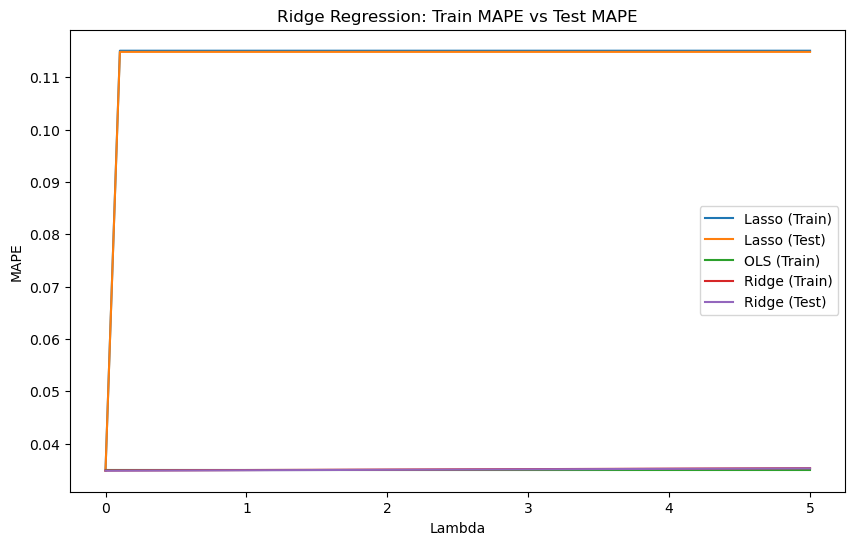

In [53]:
# Plotting the results
plt.figure(figsize=(10, 6))
#plt.xscale('log')


np.repeat(ols_test_mape,len(lambda_values))
#plt.plot(lambda_values, np.repeat(ols_train_mape,len(lambda_values)), label='OLS (Train)')
#plt.plot(lambda_values, np.repeat(ols_test_mape,len(lambda_values)), label='OLS (Test)')

plt.plot(lambda_values, lasso_train_mape, label='Lasso (Train)')
plt.plot(lambda_values, lasso_test_mape, label='Lasso (Test)')
plt.xlabel('Lambda')
plt.ylabel('MAPE')
plt.title('Lasso Regression: Train MAPE vs Test MAPE')
#plt.legend()
#plt.show()

#plt.figure(figsize=(10, 6))
plt.plot(lambda_values, np.repeat(ols_train_mape,len(lambda_values)), label='OLS (Train)')
#plt.plot(lambda_values, np.repeat(ols_test_mape,len(lambda_values)), label='OLS (Test)')

plt.plot(lambda_values, ridge_train_mape, label='Ridge (Train)')
plt.plot(lambda_values, ridge_test_mape, label='Ridge (Test)')
plt.xlabel('Lambda')
plt.ylabel('MAPE')
plt.title('Ridge Regression: Train MAPE vs Test MAPE')
plt.legend()
plt.show()

### Inferences:
1. Ols seems to be performing slightly poor in comaprison to lasso and ridge 
2. Ridge has done a better job at bridging the gap between train and test MAPE 
3. Lasso seems better performing when it comes to the MAPE scores 

### Running all three models, - Linear Regression, KNN, Decision Tree

## K- Nearest Neighbors

In [59]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np


# Define the KNN regressor
knn_regressor = KNeighborsRegressor()

# Define the parameter grid for randomized search
param_grid = {
    'n_neighbors': np.arange(1, 21),  # Range of k values to try
    'weights': ['uniform', 'distance'],
    'p': [1, 2]  # 1: Manhattan distance, 2: Euclidean distance
}

# Perform randomized search using cross-validation
randomized_search = RandomizedSearchCV(
    estimator=knn_regressor,
    param_distributions=param_grid,
    n_iter=10,  # Number of parameter settings to sample
    cv=5,
    random_state=42
)
randomized_search.fit(X_train, y_train)

# Get the best model and its parameters
best_model = randomized_search.best_estimator_
best_params = randomized_search.best_params_

# Print the best parameters
print("Best Parameters: ", best_params)

# Evaluate the best model on the train set
y_train_pred = best_model.predict(X_train)
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)
print("Train Mean Squared Error: ", mse_train)
print("Train R-squared: ", r2_train)

# Evaluate the best model on the test set
y_test_pred = best_model.predict(X_test)
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)
print("Test Mean Squared Error: ", mse_test)
print("Test R-squared: ", r2_test)


# Calculate MAPE for train 
absolute_diff_train = np.abs(y_train - y_train_pred)
percentage_error_train = (absolute_diff_train / y_train) * 100
mape_train = np.mean(percentage_error_train)

# Calculate MAPE for test 
absolute_diff = np.abs(y_test - y_test_pred)
percentage_error = (absolute_diff / y_test) * 100
mape = np.mean(percentage_error)
print("Mean Absolute Percentage Error (MAPE): ", mape)

Best Parameters:  {'weights': 'uniform', 'p': 2, 'n_neighbors': 3}
Train Mean Squared Error:  0.013428647606702421
Train R-squared:  0.9869496315342328
Test Mean Squared Error:  0.027988227267732188
Test R-squared:  0.9728645761818997
Mean Absolute Percentage Error (MAPE):  1.5590038284171135


In [60]:
import pandas as pd

# Store the results in a DataFrame
results = pd.DataFrame({
    'Metric': ['Mean Squared Error', 'R-squared', 'MAPE'],
    'Train': [mse_train, r2_train, mape_train],
    'Test': [mse_test, r2_test, mape]
})

# Print the best parameters and results
print("Best Parameters: ", best_params)
print(results)


Best Parameters:  {'weights': 'uniform', 'p': 2, 'n_neighbors': 3}
               Metric     Train      Test
0  Mean Squared Error  0.013429  0.027988
1           R-squared  0.986950  0.972865
2                MAPE  1.063910  1.559004


### Interpretation
- The train and test MSE are both considerably low which is an indication of a good model, this is a sign of consistency again
- The R-square of both the model are good

### Deision Tree Regressor 

In [61]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import numpy as np

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the decision tree regressor
dt_regressor = DecisionTreeRegressor()

# Define the parameter grid for the grid search
param_grid = {
    'max_depth': np.arange(1, 10)  # Range of tree depths to try
}

# Perform grid search using cross-validation
grid_search = GridSearchCV(estimator=dt_regressor, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best model and its parameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Print the best parameters
print("Best Parameters: ", best_params)

# Evaluate the best model on the train set
y_train_pred = best_model.predict(X_train)
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)
print("Train Mean Squared Error: ", mse_train)
print("Train R-squared: ", r2_train)

# Evaluate the best model on the test set
y_test_pred = best_model.predict(X_test)
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)
print("Test Mean Squared Error: ", mse_test)
print("Test R-squared: ", r2_test)

# Calculate MAPE for train 
absolute_diff_train = np.abs(y_train - y_train_pred)
percentage_error_train = (absolute_diff_train / y_train) * 100
mape_train = np.mean(percentage_error_train)

# Calculate MAPE for test 
absolute_diff = np.abs(y_test - y_test_pred)
percentage_error = (absolute_diff / y_test) * 100
mape = np.mean(percentage_error)
print("Mean Absolute Percentage Error (MAPE): ", mape)

Best Parameters:  {'max_depth': 9}
Train Mean Squared Error:  0.028315545451156433
Train R-squared:  0.9724820911033263
Test Mean Squared Error:  0.031066726158910762
Test R-squared:  0.9698798793900456
Mean Absolute Percentage Error (MAPE):  1.6637015251134983


In [63]:
import pandas as pd

# Store the results in a DataFrame
results = pd.DataFrame({
    'Metric': ['Mean Squared Error', 'R-squared','MAPE'],
    'Train': [mse_train, r2_train, mape_train],
    'Test': [mse_test, r2_test, mape]
})

# Print the best parameters and results
print("Best Parameters: ", best_params)
print(results)


Best Parameters:  {'max_depth': 9}
               Metric     Train      Test
0  Mean Squared Error  0.028316  0.031067
1           R-squared  0.972482  0.969880
2                MAPE  1.582680  1.663702


### Interpretation:
- The TRAIN and TEST MSE seem to be close enough to say that the model is performing consistenty.
- The R- square of both train and test are pretty good. This also talks about how well much of variance the model is able to explain.

In [ ]:
imp_df = pd.DataFrame({
    "Feature Name": X_train.columns,
    "Importance": best_model.feature_importances_
})
fi = imp_df.sort_values(by='Importance',ascending = False)
plt.figure(figsize=(10,8))
sns.barplot(data = fi,x = 'Importance',y='Feature Name')
plt.title("Feature Importances of each attribute",fontsize = 18)
plt.xlabel('Importance',fontsize=16)
plt.ylabel('Feature Name',fontsize =16)
plt.show()

## Creating a Pipeline

In [ ]:
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.neighbors import KNeighborsRegressor
from skelarn.compose import ColumnTransformer

In [ ]:
# Define the pipeline 

#defiene your features and label 
X = df2.drop(columns='price')
y = df2.price

#separating numerical and categorical columns 
cat = X.select_dtypes(include = 'object')
num = X.select_dytypes(include = 'number')

#scale the number 
scaler = StandardScaler()
scaled = pd.DataFrame(scaler.fit_transform(num))

#encode data 
encoder = OneHotEncoder()
encoded = pd.DtaFrame(encoder.fit_transform(cat).toarray(), columns = encoder.get_feature_names(cat))


# concatenate the scaled and encoded 
df2 = pd.concat([scaled, encoded,y], axis = 1)

#Decision Tree 

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the decision tree regressor
dt_regressor = DecisionTreeRegressor(max_depth=9)


# Perform grid search using cross-validation
grid_search = GridSearchCV(estimator=dt_regressor, cv=5)
grid_search.fit(X_train, y_train)

# Get the best model and its parameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Print the best parameters
print("Best Parameters: ", best_params)

# Evaluate the best model on the train set
y_train_pred = best_model.predict(X_train)
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)
print("Train Mean Squared Error: ", mse_train)
print("Train R-squared: ", r2_train)

# Evaluate the best model on the test set
y_test_pred = best_model.predict(X_test)
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)
print("Test Mean Squared Error: ", mse_test)
print("Test R-squared: ", r2_test)

#fit the pipeline on trainng data
pipeline.fit(X_train, y_train)  

#predict using the pipeline
y_pred = pipeline.predict(X_test)